In [14]:
from PIL import Image
%matplotlib inline
#%matplotlib qt

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../Santander"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

0_1_data_loading.ipynb
Clustering_analysis.ipynb
dict
sample_submission.csv (1).zip
test_ver2.csv
test_ver2.csv.zip
train_ver2.csv
train_ver2.csv.zip



In [4]:
N_ROWS = 1000
filename = "../Santander/train_ver2.csv"

#n = sum(1 for line in open(filename)) - 1 #number of records in file (excludes header)
n = 13647309 #number of records in train_ver2.csv
print(n)
skip = sorted(random.sample(range(1,n+1),n-N_ROWS)) #the 0-indexed header will not be included in the skip list

13647309


In [5]:
df = pd.read_csv(filename, skiprows=skip)
print(df.shape)

(1000, 48)


In [6]:
df['fecha_dato'] = pd.to_datetime(df['fecha_dato'])
df['fecha_alta'] = pd.to_datetime(df['fecha_alta'])

In [8]:
import re 

pattern = re.compile("ind_.*_ult1")

prod_cols = [ x for x in df.columns if re.match(pattern,x) ]
prod_cols.append("ncodpers")
print(prod_cols)

['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1', 'ncodpers']


In [10]:
df_dummiesed = pd.get_dummies(df)
df_dummiesed = df_dummiesed.drop_duplicates(subset="ncodpers",keep="last")
df_dummiesed["fecha_alta"] = pd.to_numeric(df_dummiesed["fecha_alta"])
df_dummiesed["fecha_dato"] = pd.to_numeric(df_dummiesed["fecha_dato"])
#df_dummiesed = df_dummiesed.drop("conyuemp",axis=1).fillna(df_dummiesed.mean())
df_dummiesed = df_dummiesed.drop("conyuemp",axis=1).dropna()

#print(df_dummiesed.describe())

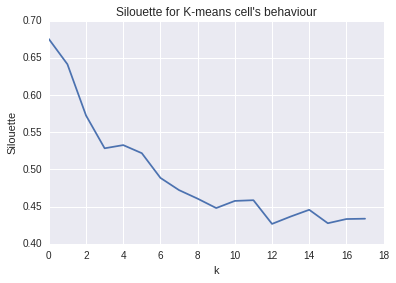

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

s = []
for n_clusters in range(2,20):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df_dummiesed)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    s.append(silhouette_score(df_dummiesed, labels, metric='euclidean'))

plt.plot(s)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")
sns.despine()

[ 0 10 10 10  5  5  5  5  5  5  4  4  4  4  4  4  4  0  0  0  0  0  0  8  7
  8  8  8  8  6  1  1  9  9  7  7  7  7  9  9  9  2  2  2  1  1  1  1  1  1
  6  8  3  3  3  0  8  8  8  8  8  8  0  0  0  4  4  4  4  4  5  5  5  5  5
  5  5  5  5 10  0 10 10 10 10  7  7  3  9  9  9  2  2  1  1  6  8  8  0  0
  0  0  0  0  4  4  4  4  4  4  4 10 10  5  0  0 10 10 10  7  3  3  3  7  3
  9  9  2  2  2  2  2  2  1  1  1  6  6  6  8  8  8  8  8  0  0  0  4  4  4
  4  4  5  5 10  5 10 10 10 10  4 10 10  0  0 10 10 10  5  5  5  5  5  4  4
  4  0  0  0  0  8  8  6  6  6  6  6  3  1  1  1  2  2  2  2  2  9  9  9  9
  3  3  9  7  7  2  7 10 10  5  5  5  5  5  5 10 10 10  5  4  4  4  0  0  0
  0  4  0  0  8  8  3  3  3  8  6  6  6  1  9  9  7  7  7  2  7  7  2  2  2
  7  7  7  7  5  5  9  2  9  9  1  1  6  8  6  1  3  3  0 10 10 10 10  0 10
  5  5 10  4  4  4  4  4  0  0  0  4  5  5  5  5  4  9  9  9  9  9  9  5  5
  7  7  7  7  3  2  2  2  5  7  4  4  4  4  4  4 10  0  0  0  1  1  1  1  6
  6  8  3  3

(array([  84.,   56.,   59.,   49.,  143.,   85.,   39.,   63.,   71.,  149.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 10 Patch objects>)

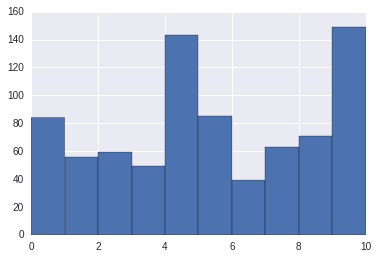

In [17]:
N_CLUSTERS = 11
kmeans = KMeans(n_clusters=N_CLUSTERS)
kmeans.fit(df_dummiesed)

print(kmeans.labels_)
plt.hist(kmeans.labels_,bins=N_CLUSTERS-1)

In [19]:
from sklearn.metrics.pairwise import cosine_similarity

sim = cosine_similarity(df_dummiesed,dense_output=False)
df_sim = pd.DataFrame(sim,columns=df_dummiesed['ncodpers'],index=df_dummiesed['ncodpers'])

#print(df_sim)